Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

Data Collection and Analysis

In [2]:
# Loading the diabetes dataset to a Pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Number of Rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [4]:
# Getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Looking for Outliers using the Interquartile Range (IQR) method and removing them

In [5]:
# For 'Pregnancies' column
Q1_Preg = diabetes_dataset.Pregnancies.quantile(0.25)
Q3_Preg = diabetes_dataset.Pregnancies.quantile(0.75)
IQR_Preg = Q3_Preg - Q1_Preg
IQR_Preg

5.0

In [6]:
lower_limit_Preg = Q1_Preg - 1.5 * IQR_Preg
upper_limit_Preg = Q3_Preg + 1.5 * IQR_Preg
lower_limit_Preg, upper_limit_Preg

(-6.5, 13.5)

In [7]:
diabetes_dataset[(diabetes_dataset.Pregnancies < lower_limit_Preg) | (diabetes_dataset.Pregnancies > upper_limit_Preg)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [8]:
diabetes_dataset = diabetes_dataset[(diabetes_dataset.Pregnancies > lower_limit_Preg) & (diabetes_dataset.Pregnancies < upper_limit_Preg)]
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# For 'Glucose' column
Q1_Gluc = diabetes_dataset.Glucose.quantile(0.25)
Q3_Gluc = diabetes_dataset.Glucose.quantile(0.75)
IQR_Gluc = Q3_Gluc - Q1_Gluc
IQR_Gluc

41.0

In [10]:
lower_limit_Gluc = Q1_Gluc - 1.5 * IQR_Gluc
upper_limit_Gluc = Q3_Gluc + 1.5 * IQR_Gluc
lower_limit_Gluc, upper_limit_Gluc

(37.5, 201.5)

In [11]:
diabetes_dataset[(diabetes_dataset.Glucose < lower_limit_Gluc) | (diabetes_dataset.Glucose > upper_limit_Gluc)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [12]:
diabetes_dataset = diabetes_dataset[(diabetes_dataset.Glucose > lower_limit_Gluc) & (diabetes_dataset.Glucose < upper_limit_Gluc)]
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
# Similarly removing outliers from each of the rest columns

# Define function to update multiple columns
def remove_outlier(diabetes_dataset):
    for column in diabetes_dataset.columns[2:8]:
        # Calculating IQR
        Q1_Col = diabetes_dataset[column].quantile(0.25)
        Q3_Col = diabetes_dataset[column].quantile(0.75)
        IQR_Col = Q3_Col - Q1_Col
    
        # Calculating the Lower and Upper limits
        lower_limit_Col = Q1_Col - 1.5 * IQR_Col
        upper_limit_Col = Q3_Col + 1.5 * IQR_Col
    
        # Removing the Outliers
        diabetes_dataset = diabetes_dataset[(diabetes_dataset[column] > lower_limit_Col) & (diabetes_dataset[column] < upper_limit_Col)]
    
    return diabetes_dataset

# Apply function to update multiple columns
diabetes_dataset = remove_outlier(diabetes_dataset)
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Saving the improved dataset as a .csv file

In [14]:
diabetes_dataset.to_csv('diabetes_dataset_improved.csv', index = False)

In [15]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    438
1    198
Name: count, dtype: int64

0 -> Non-diabetic

1 -> Diabetic

In [17]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.278539,109.216895,70.678082,20.289954,61.990868,30.819406,0.397532,30.627854
1,4.909091,140.116162,74.969697,21.858586,84.005051,34.595455,0.486874,36.858586


In [18]:
X = diabetes_dataset.drop(columns='Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
Y = diabetes_dataset.Outcome
Y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 636, dtype: int64

Data Standardization (Gets all the values in a similar range, better for model to learn and predict)

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X)

StandardScaler()

In [22]:
standardized_data = scaler.transform(X)
standardized_data

array([[ 6.81425557e-01,  1.00708292e+00, -1.25217228e-03, ...,
         2.50111624e-01,  8.25676652e-01,  1.60448130e+00],
       [-8.57589551e-01, -1.16845075e+00, -5.32173219e-01, ...,
        -8.40696515e-01, -3.04410807e-01, -1.44283201e-01],
       [ 1.29703160e+00,  2.21571274e+00, -7.09146901e-01, ...,
        -1.35493464e+00,  1.00993004e+00, -5.22429645e-02],
       ...,
       [ 3.73622536e-01,  7.47113491e-02, -1.25217228e-03, ...,
        -9.03028409e-01, -7.38429903e-01, -2.36323438e-01],
       [-8.57589551e-01,  2.47372752e-01, -1.06309427e+00, ...,
        -2.95292446e-01, -3.12599846e-01,  1.32836059e+00],
       [-8.57589551e-01, -8.92192506e-01, -1.78225855e-01, ...,
        -2.48543526e-01, -4.51813519e-01, -8.80605094e-01]])

In [23]:
X = standardized_data

In [24]:
print(X)
print(Y)

[[ 6.81425557e-01  1.00708292e+00 -1.25217228e-03 ...  2.50111624e-01
   8.25676652e-01  1.60448130e+00]
 [-8.57589551e-01 -1.16845075e+00 -5.32173219e-01 ... -8.40696515e-01
  -3.04410807e-01 -1.44283201e-01]
 [ 1.29703160e+00  2.21571274e+00 -7.09146901e-01 ... -1.35493464e+00
   1.00993004e+00 -5.22429645e-02]
 ...
 [ 3.73622536e-01  7.47113491e-02 -1.25217228e-03 ... -9.03028409e-01
  -7.38429903e-01 -2.36323438e-01]
 [-8.57589551e-01  2.47372752e-01 -1.06309427e+00 ... -2.95292446e-01
  -3.12599846e-01  1.32836059e+00]
 [-8.57589551e-01 -8.92192506e-01 -1.78225855e-01 ... -2.48543526e-01
  -4.51813519e-01 -8.80605094e-01]]
0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 636, dtype: int64


Splitting the data into training and testing datasets

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
# stratify ensures that the train and test data is splitted uniformally preventing all the 0s or all the 1s 
# to be entirely in train or test dataset


In [26]:
print(X_train.shape, X_test.shape)

(508, 8) (128, 8)


Training the Model

In [27]:
# Checking for the best kernel in SVM for this dataframe
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_train)
    print(k)
    print(accuracy_score(Y_train, Y_pred))

linear
0.7775590551181102
poly
0.8149606299212598
rbf
0.8208661417322834
sigmoid
0.6791338582677166


In [28]:
# Therefore using the RBF kernel for our model
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, Y_train)

SVC()

Model Evaluation

Accuracy Score

In [29]:
# Accuracy check for the training dataset
X_train_pred = classifier.predict(X_train)
print('Accuracy score for the training dataset: ', accuracy_score(X_train_pred, Y_train))

Accuracy score for the training dataset:  0.8208661417322834


In [31]:
# Accuracy check for the testing dataset
X_test_pred = classifier.predict(X_test)
print('Accuracy score for the testing dataset: ', accuracy_score(X_test_pred, Y_test))

Accuracy score for the testing dataset:  0.859375


In [33]:
# Performance analysis on the test dataset using Confusion Matrix
cm = confusion_matrix(Y_test, X_test_pred)
print(cm)

[[86  2]
 [16 24]]


Text(70.72222222222221, 0.5, 'Actual value')

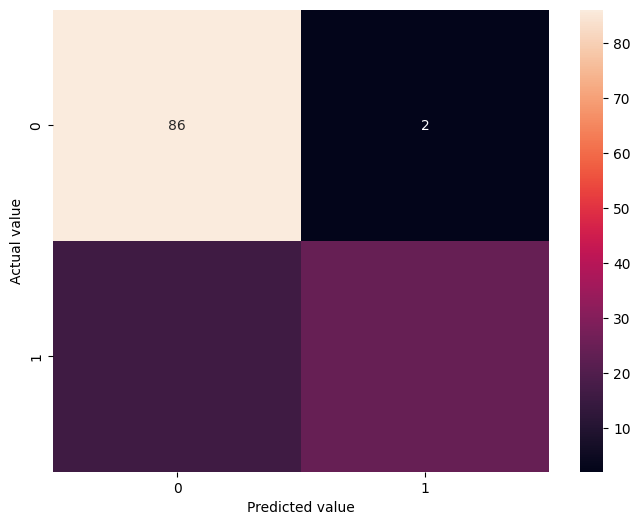

In [39]:
# Visualising the confusion matrix using Heatmap
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

In [40]:
# Classification Report 
cr = classification_report(Y_test, X_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91        88
           1       0.92      0.60      0.73        40

    accuracy                           0.86       128
   macro avg       0.88      0.79      0.82       128
weighted avg       0.87      0.86      0.85       128



Building the Prediction Model

In [41]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# Changing the input data to Numpy array
data_array = np.asarray(input_data)

# Reshaping the array as we are predicting for one instance
data_reshaped = data_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(data_reshaped)
print(std_data)

# Predicting and printing the prediction
prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0] == 0):                     # prediction is a list as shown in output
    print('The person is not diabetic!')
else:
    print('The person is diabetic')    

[[ 3.73622536e-01  1.62866397e+00 -1.25217228e-03 -1.16514686e-01
   1.27731628e+00 -9.65360302e-01  6.61895861e-01  1.69652153e+00]]
[1]
The person is diabetic
